In [1]:
from google.colab import files
uploaded = files.upload()

Saving Judgment_Embeddings_InLegalBERT.xlsx to Judgment_Embeddings_InLegalBERT.xlsx


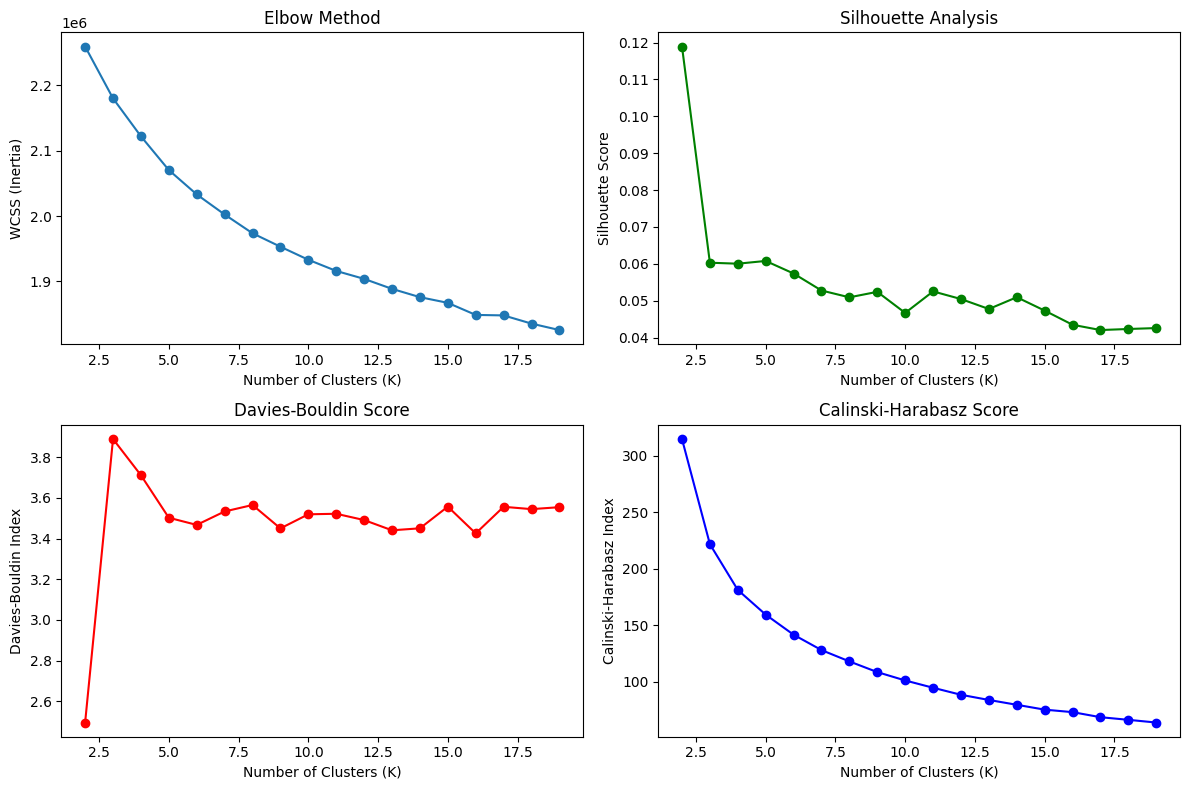

Optimal K from Silhouette Score: 2
Optimal K from Davies-Bouldin Score: 2
Optimal K from Calinski-Harabasz Score: 2
Optimal K from Elbow Method: 16
Clustering results saved to: KMeans_Clusters_Optimal_K.xlsx


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Load dataset
file_path = "Judgment_Embeddings_InLegalBERT.xlsx"
df = pd.read_excel(file_path)

# Extract features
X = df.drop(columns=["Label"]).values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define range for K
K_range = range(2, 20)

# Store metrics
wcss = []  # Inertia (Elbow Method)
sil_scores = []  # Silhouette Score
db_scores = []  # Davies-Bouldin Index
ch_scores = []  # Calinski-Harabasz Index

# Compute K-Means for different K values
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    # Compute metrics
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))

# Plot all metrics
plt.figure(figsize=(12, 8))

# Elbow Method (WCSS)
plt.subplot(2, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")

# Silhouette Score
plt.subplot(2, 2, 2)
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

# Davies-Bouldin Index
plt.subplot(2, 2, 3)
plt.plot(K_range, db_scores, marker='o', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Score")

# Calinski-Harabasz Index
plt.subplot(2, 2, 4)
plt.plot(K_range, ch_scores, marker='o', color='blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Calinski-Harabasz Index")
plt.title("Calinski-Harabasz Score")

plt.tight_layout()
plt.show()

# Determine optimal K based on highest Silhouette Score,lowest Davies-Bouldin, and Calinski-Harabasz
optimal_k_silhouette = K_range[np.argmax(sil_scores)]
optimal_k_db = K_range[np.argmin(db_scores)]  # Davies-Bouldin lower is better
optimal_k_ch = K_range[np.argmax(ch_scores)]  # Calinski-Harabasz higher is better

# Elbow method: Find the "elbow" point (where the inertia starts to decrease slower)
wcss_diff = np.diff(wcss)
elbow_point = np.argmax(wcss_diff) + 2  # Add 2 to adjust for the difference starting at K=2

print(f"Optimal K from Silhouette Score: {optimal_k_silhouette}")
print(f"Optimal K from Davies-Bouldin Score: {optimal_k_db}")
print(f"Optimal K from Calinski-Harabasz Score: {optimal_k_ch}")
print(f"Optimal K from Elbow Method: {elbow_point}")

# Select the final optimal K by considering all metrics (choose the one that makes sense from analysis)
optimal_k = optimal_k_silhouette  # You can choose based on Silhouette Score, for example

# Perform K-Means with optimal K (from Silhouette Score)
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster_Silhouette"] = kmeans_opt.fit_predict(X_scaled)

# Perform K-Means with optimal K from Elbow Method
kmeans_opt_elbow = KMeans(n_clusters=elbow_point, random_state=42, n_init=10)
df["Cluster_Elbow"] = kmeans_opt_elbow.fit_predict(X_scaled)

# Save results to Excel with both clustering results
output_path = "KMeans_Clusters_Optimal_K.xlsx"
df.to_excel(output_path, index=False)
print(f"Clustering results saved to: {output_path}")


In [11]:
from google.colab import files
file_path = "KMeans_Clusters_Optimal_K.xlsx"
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

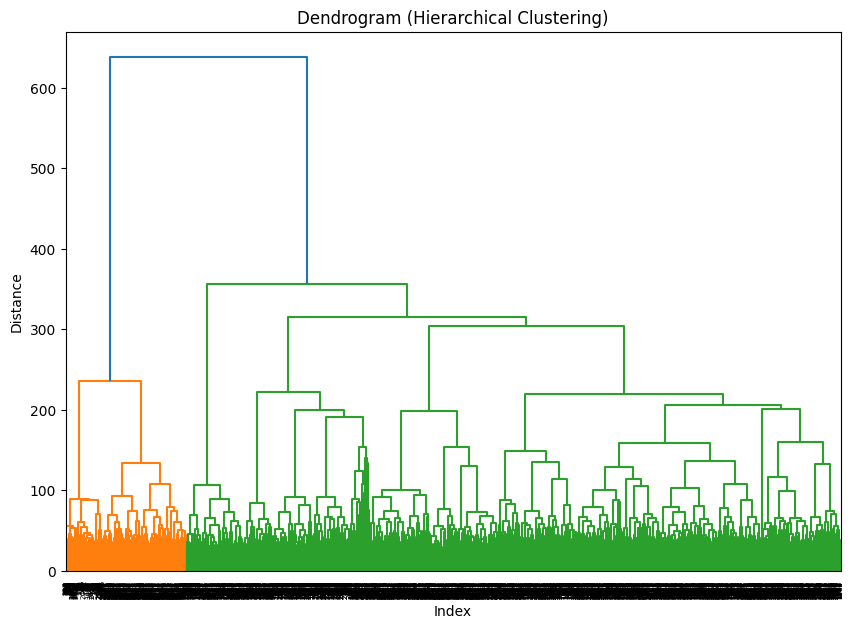

Optimal number of clusters (k): 2
Clustering results saved to: Hierarchical_Clusters_Auto.xlsx


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load dataset
file_path = "Judgment_Embeddings_InLegalBERT.xlsx"
df = pd.read_excel(file_path)

# Extract features
X = df.drop(columns=["Label"]).values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Hierarchical Clustering (Agglomerative)
linked = linkage(X_scaled, method='ward')  # Ward method minimizes variance within clusters

# Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# Automatically determine clusters by finding a threshold based on the largest gap
distances = linked[:, 2]  # Extract distances between clusters
distance_diffs = np.diff(distances)  # Compute differences between consecutive distances
threshold = distances[np.argmax(distance_diffs)]  # Select the largest jump in distances

# Form clusters using the threshold
clusters = fcluster(linked, threshold, criterion='distance')

# Get the number of unique clusters (i.e., k value)
num_clusters = len(np.unique(clusters))
print(f"Optimal number of clusters (k): {num_clusters}")

# Add cluster results to DataFrame
df["Cluster_Hierarchical"] = clusters

# Save results to Excel
output_path = "Hierarchical_Clusters_Auto.xlsx"
df.to_excel(output_path, index=False)
print(f"Clustering results saved to: {output_path}")

In [15]:
from google.colab import files
file_path = "Hierarchical_Clusters_Auto.xlsx"
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
!pip install kneed

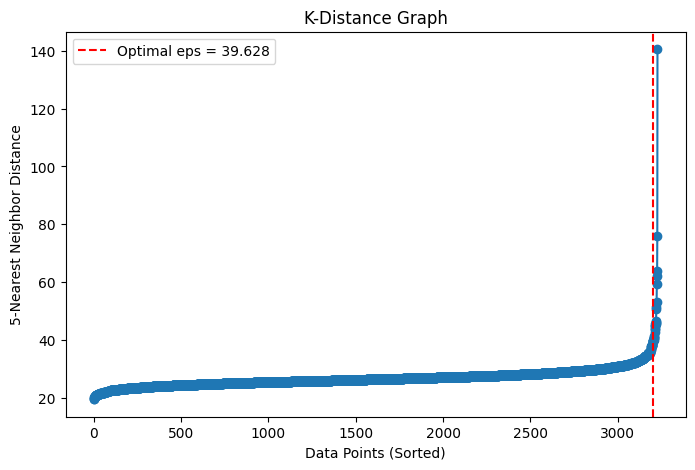

Optimal Epsilon (eps): 39.628
Silhouette Score: 0.4015
Davies-Bouldin Index: 1.0014
Calinski-Harabasz Index: 18.3227
Clustering results saved to: DBSCAN_Clusters.xlsx


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# Load dataset
file_path = "Judgment_Embeddings_InLegalBERT.xlsx"
df = pd.read_excel(file_path)

# Extract features
X = df.drop(columns=["Label"]).values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Compute K-Distance Graph to find optimal `eps`
min_samples = 5  # Default, can be adjusted based on dataset density
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(X_scaled)
distances, _ = neighbors.kneighbors(X_scaled)

# Sort distances for elbow method
sorted_distances = np.sort(distances[:, -1])

# Use KneeLocator to automatically detect the elbow (optimal `eps`)
knee = KneeLocator(range(len(sorted_distances)), sorted_distances, curve="convex", direction="increasing")
optimal_eps = sorted_distances[knee.elbow]  # Auto-selected `eps`

# Plot K-Distance Graph
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, marker="o", linestyle="-")
plt.axvline(knee.elbow, color='r', linestyle='--', label=f"Optimal eps = {optimal_eps:.3f}")
plt.xlabel("Data Points (Sorted)")
plt.ylabel(f"{min_samples}-Nearest Neighbor Distance")
plt.title("K-Distance Graph")
plt.legend()
plt.show()

print(f"Optimal Epsilon (eps): {optimal_eps:.3f}")

# Step 2: Perform DBSCAN Clustering with optimal eps
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

# Step 3: Evaluate Clustering (excluding noise points)
valid_labels = df["DBSCAN_Cluster"].values[df["DBSCAN_Cluster"] != -1]  # Exclude noise (-1)

if len(np.unique(valid_labels)) > 1:  # At least 2 clusters required
    sil_score = silhouette_score(X_scaled[df["DBSCAN_Cluster"] != -1], valid_labels)
    db_score = davies_bouldin_score(X_scaled[df["DBSCAN_Cluster"] != -1], valid_labels)
    ch_score = calinski_harabasz_score(X_scaled[df["DBSCAN_Cluster"] != -1], valid_labels)
    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"Davies-Bouldin Index: {db_score:.4f}")
    print(f"Calinski-Harabasz Index: {ch_score:.4f}")
else:
    print("DBSCAN found mostly noise (-1 labels). Try adjusting `min_samples`.")

# Step 4: Save Results to Excel
output_path = "DBSCAN_Clusters.xlsx"
df.to_excel(output_path, index=False)
print(f"Clustering results saved to: {output_path}")

In [23]:
from google.colab import files
file_path = "DBSCAN_Clusters.xlsx"
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>